In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.datasets import make_blobs,make_biclusters,make_moons

# 数据集

In [70]:
# 构造一个数据集
X, y= make_blobs(n_samples=300 ,n_features=2, centers=[[0,0],[1.5,4],[4,2.5]])
# X, y = make_moons(n_samples=300)

print(X.__class__, X.shape)
print(y.__class__, y.shape)

<class 'numpy.ndarray'> (300, 2)
<class 'numpy.ndarray'> (300,)


In [71]:
y_ = pd.Series(y)
print(y_.value_counts())

2    100
1    100
0    100
dtype: int64


In [72]:
X_y = np.hstack([X,y.reshape(-1,1)])
print(X_y.shape)
X_y = pd.DataFrame(X_y, columns=['x1','x2','group'])

(300, 3)


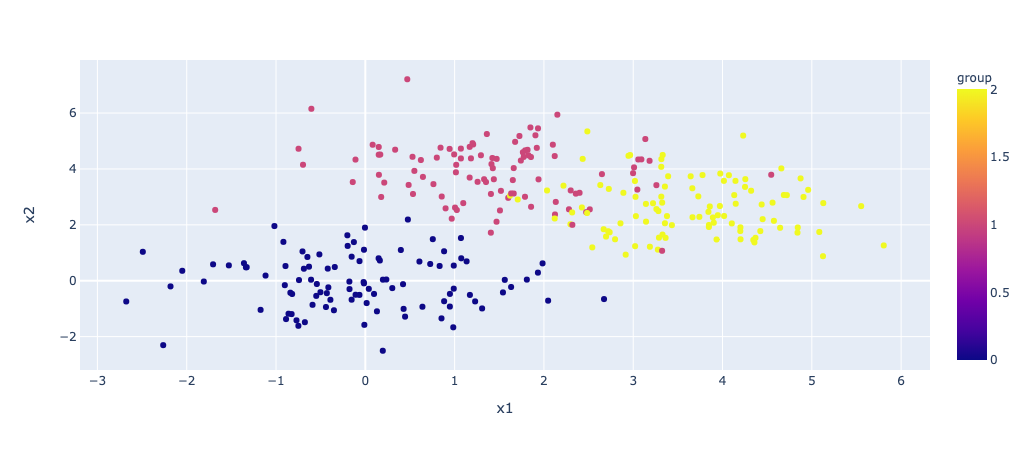

In [73]:
# sns.relplot(data=X_y, x='x1',y='x2', hue='group' )
px.scatter(data_frame=X_y, x='x1', y='x2',color='group')

# KMeans聚类

In [75]:
# KMeans是类， k_means是函数
from sklearn.cluster import KMeans, k_means

In [81]:
n_clusters = 3
result = KMeans(n_clusters=n_clusters).fit(X)

In [82]:
result.n_clusters

3

In [83]:
result.cluster_centers_

array([[-0.09443402, -0.05218585],
       [ 3.62849894,  2.57461126],
       [ 1.31199454,  4.03068463]])

In [86]:
print(result.labels_.shape)
result.labels_[:5]

(300,)


array([1, 0, 0, 2, 1], dtype=int32)

In [87]:
result.inertia_

504.8078567505118

如果数据量太大，可以使用一部分数据进行fit，然后使用predict来对剩余的数据进行聚类

In [89]:
X_cluster = np.hstack([X, result.labels_.reshape(-1,1)])
X_cluster = pd.DataFrame(X_cluster, columns=['x1','x2','cluster'])

## 轮廓系数

In [90]:
# 计算整个数据集的轮廓系数均值
from sklearn.metrics import silhouette_score
# 计算每个样本的轮廓系数
from sklearn.metrics import silhouette_samples

In [91]:
silhouette_score(X, result.labels_)

0.49422789699634107

In [92]:
s_samples = silhouette_samples(X, result.labels_)

In [93]:
s_samples.shape

(300,)

In [94]:
s_samples[:5]

array([0.59247868, 0.68893299, 0.67043253, 0.54491189, 0.62488703])

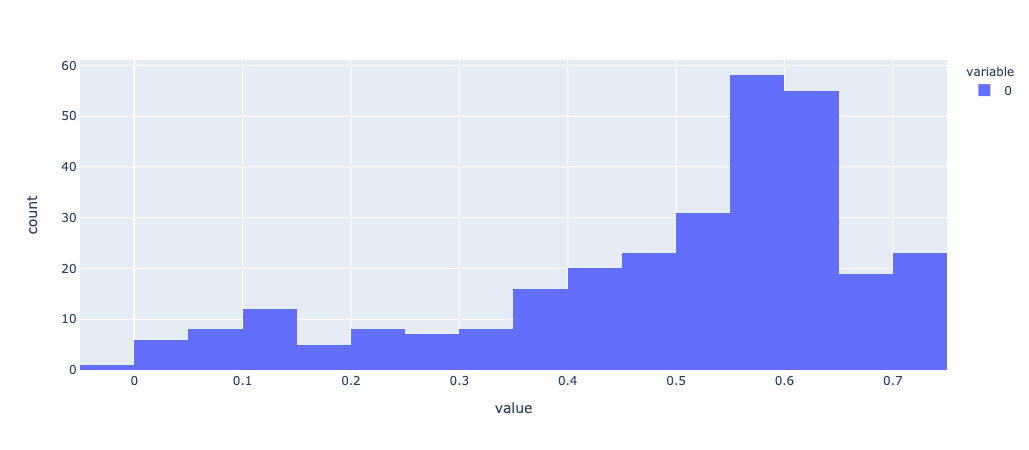

In [95]:
px.histogram(data_frame=s_samples)

# KMean聚类做矢量量化

In [97]:
# 这个里面只有两张图片，一张颐和园的，一张花的
from sklearn.datasets import load_sample_image

In [100]:
# 颐和园图片
yiheyuan = load_sample_image('china.jpg')

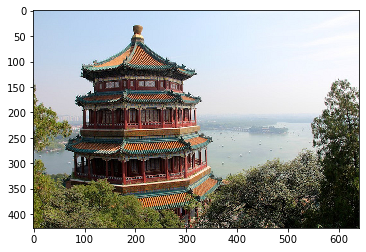

In [99]:
plt.imshow(yiheyuan)